In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
%cd "/content/drive/MyDrive"

/content/drive/MyDrive


### Background Removal

In [ ]:
import cv2
import glob
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

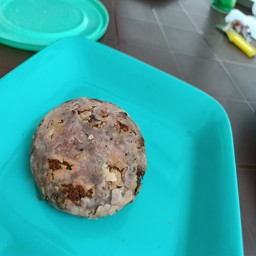

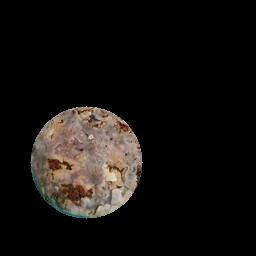

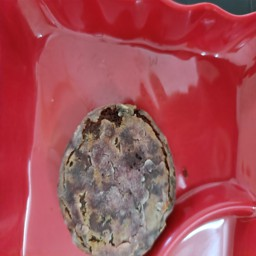

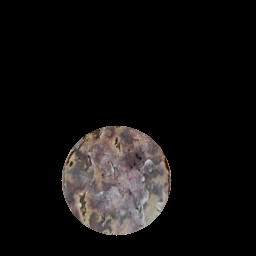

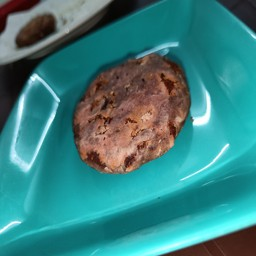

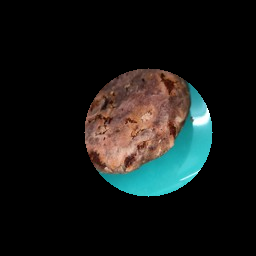

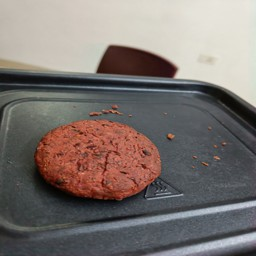

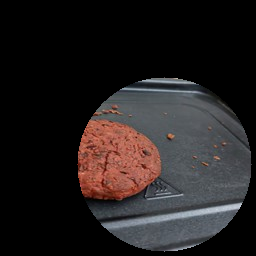

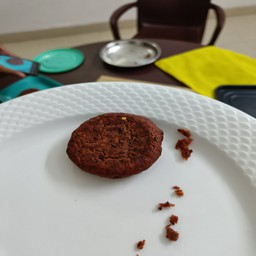

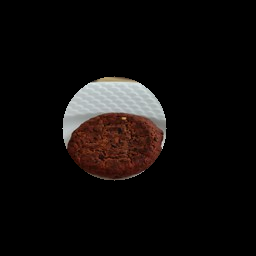

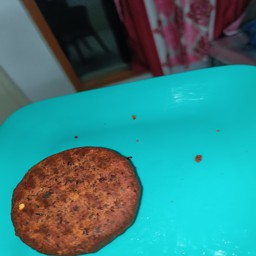

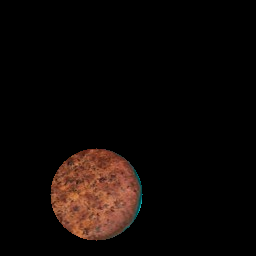

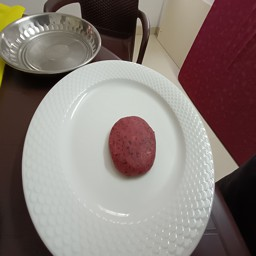

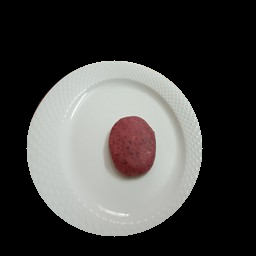

In [ ]:
def background_extractor(image_path):
  name = image_path.split("/")[-1]
  image = cv2.imread(image_path)
  cv2_imshow(image)
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  edges = cv2.Canny(gray, 30, 150)
  circles = cv2.HoughCircles(edges, cv2.HOUGH_GRADIENT, dp=1, minDist=20,
                           param1=50, param2=30, minRadius=30, maxRadius=90)
  x, y, r = np.uint16(np.around(circles[0, 0]))
  mask = np.zeros_like(gray)
  cv2.circle(mask, (x, y), r, (255, 255, 255), -1)
  result = np.zeros_like(image)
  result[mask == 255] = image[mask == 255]
  cv2_imshow(result)
  cv2.imwrite(f"CS_499/Result/{name}", result)

images = glob.glob("CS_499/*.jpg")
for i, image_path in enumerate(images):
  background_extractor(image_path)

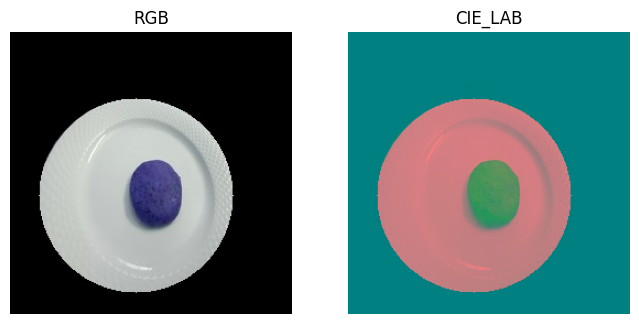

In [ ]:
import cv2
import numpy as np
def convert_to_lab(image):
    lab_image = cv2.cvtColor(image, cv2.COLOR_RGB2LAB)
    return lab_image
path_to_image = '/content/drive/MyDrive/CS_499/Result/IMG20230318165447.jpg'
image_rgb = cv2.imread(path_to_image)
image_lab = convert_to_lab(image_rgb)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)
ax1.imshow(image_rgb, cmap=plt.cm.gray)
ax1.set_title('RGB')
ax1.axis('off')
ax2.imshow(image_lab, cmap=plt.cm.gray)
ax2.set_title('CIE_LAB')
ax2.axis('off')
plt.show()

(256, 256, 3)


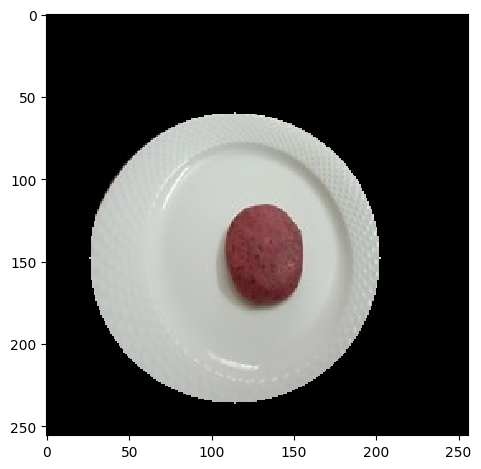

In [ ]:
from skimage.io import imread, imshow
from skimage.transform import resize
from skimage.feature import hog
from skimage import exposure
import matplotlib.pyplot as plt
%matplotlib inline


#reading the image
img = imread('/content/drive/MyDrive/CS_499/Result/IMG20230318165447.jpg')
imshow(img)
print(img.shape)

In [ ]:
fd, hog_image = hog(img, orientations=9, pixels_per_cell=(8, 8),
                    cells_per_block=(2, 2), visualize=True, multichannel=True)

<ipython-input-40-df7927e971b9>:1: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  fd, hog_image = hog(img, orientations=9, pixels_per_cell=(8, 8),


In [ ]:
fd.shape

(34596,)

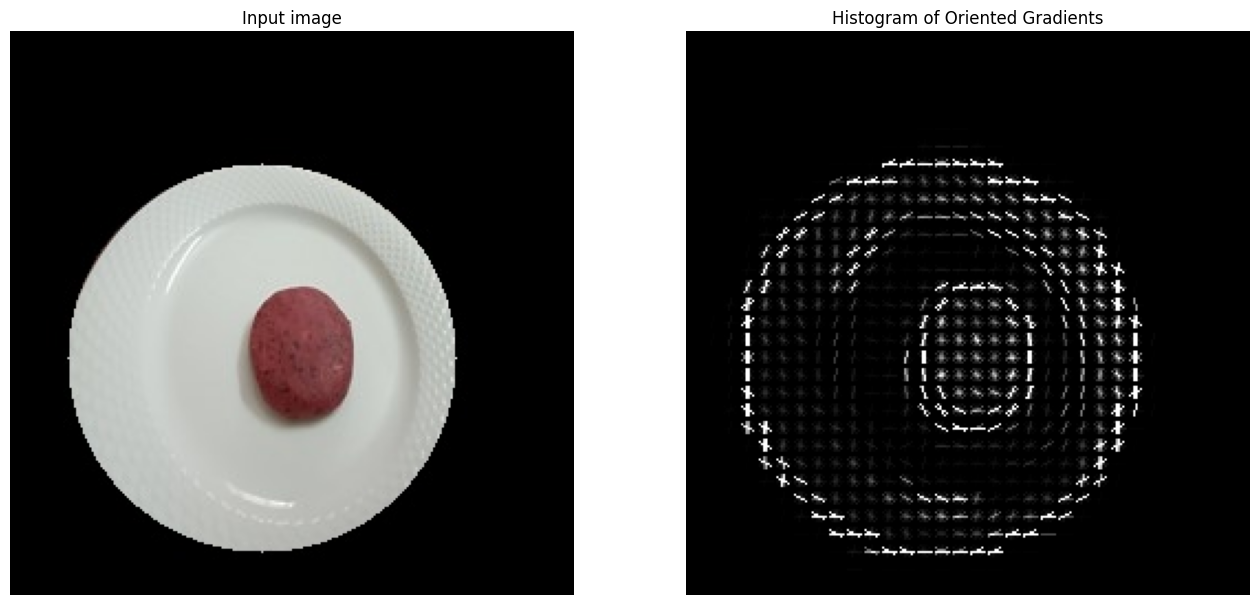

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8), sharex=True, sharey=True)
ax1.imshow(img, cmap=plt.cm.gray)
ax1.set_title('Input image')
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))
ax1.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
ax2.axis('off')
plt.show()